In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.io.wavfile import read
import scipy.io

# script importing
from peak_picking import *
from pca import *

# data loading
mat = scipy.io.loadmat(
    'data/SFOAE/sfoae20dBg130TM45R19rs2.mat')

fvect = mat['Fvect'].flatten()  # frequency axis
SFOAE = mat['oaeNum20'].flatten()  # celkove SFOAE
CRcomp = mat['CRc20'].flatten()  # CR component
NLcomp = mat['Yunl20'].flatten()  # NL component

freq_range = np.size(fvect) # maximum index on the frequency axis

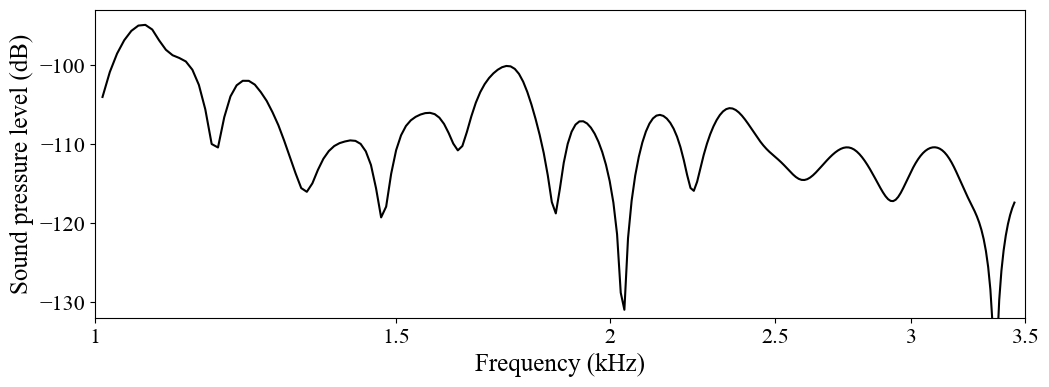

In [21]:
from matplotlib.ticker import FixedLocator, FixedFormatter

maximas = findLocalMaxima(np.real(20*np.log10(SFOAE)))
shift = 1  # 3 points around all peaks (the peak is included)
extended_maximas = peakNeighbours(maximas, shift, freq_range)


# sound wave in decibels
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(fvect/1000, 20*np.log10(SFOAE), 'k', label='SFOAE')
# ax.plot(fvect, 20*np.log10(CRcomp), 'r', label='CR component')
# ax.plot(fvect, 20*np.log10(NLcomp), 'g', label='NL component')
# ax.plot(fvect[maximas], 20 *
#         np.log10(SFOAE[maximas]), "bo",label='local maxima', mfc='none')
# ax.plot(fvect[extended_maximas]/1000, 20 *
#        np.log10(SFOAE[extended_maximas]), "rx", label='local maxima and their neighbors')

ax.set_xscale('log')
ax.set_xlim([1, 3.5])

x_ticks = [1, 1.5, 2, 2.5, 3, 3.5]
ax.xaxis.set_major_locator(FixedLocator(x_ticks))
ax.xaxis.set_major_formatter(FixedFormatter(x_ticks))
ax.tick_params(axis='both', which='major', labelsize=16)

ax.set_ylim([-132, -93])
ax.set_xlabel('Frequency (kHz)', fontdict={"fontsize": 18})
ax.set_ylabel('Sound pressure level (dB)', fontdict={"fontsize": 18})
# ax.legend(fontsize=13)
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()


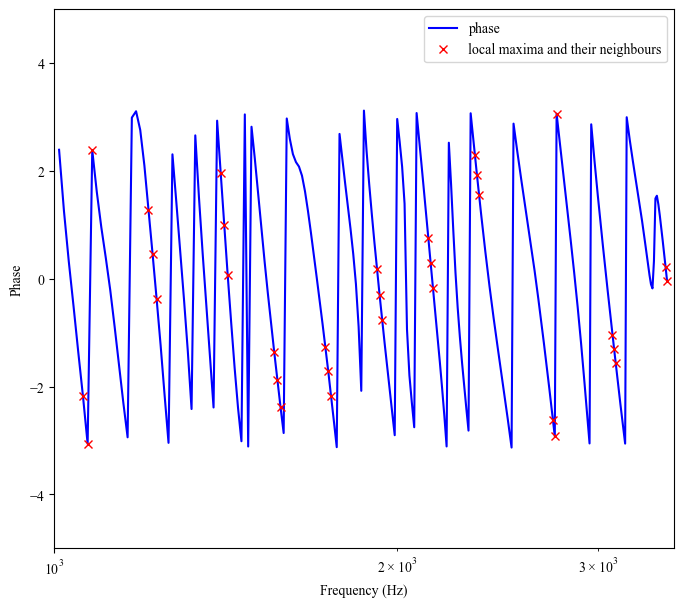

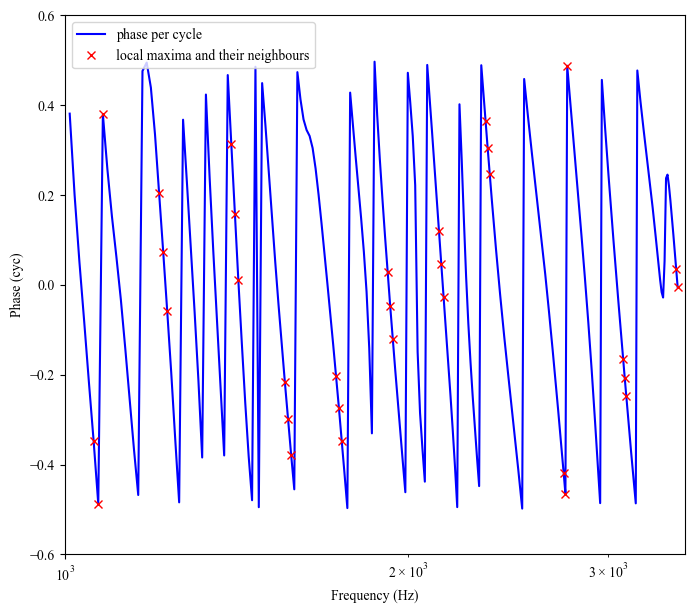

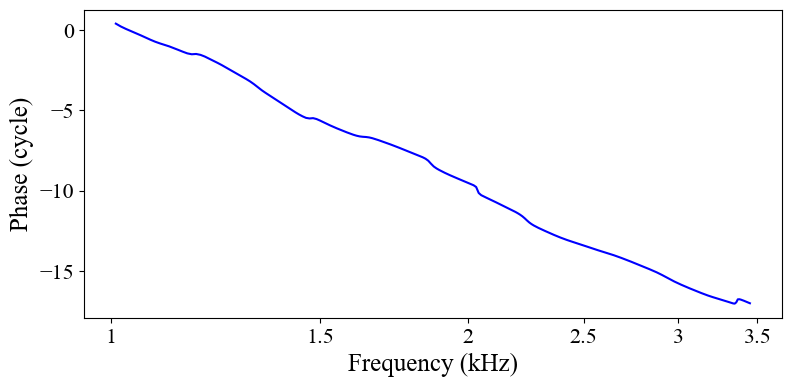

In [24]:
phase = np.angle(SFOAE)

# phase
fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(fvect, phase, 'b', label='phase')
ax.plot(fvect[extended_maximas], phase[extended_maximas],
        "rx", label='local maxima and their neighbours')        

ax.set_xscale('log')
ax.set_xlim([1000, 3.5e3])
ax.set_ylim([-5, 5])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Phase')
ax.legend()
plt.show()

# phase per cycle (2 pi)
phase_cycle = phase/(2*np.pi)
fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(fvect, phase_cycle, 'b', label='phase per cycle')
ax.plot(fvect[extended_maximas], phase_cycle[extended_maximas], "rx",
        label='local maxima and their neighbours')

ax.set_xscale('log')
ax.set_xlim([1000, 3.5e3])
ax.set_ylim([-0.6, 0.6])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Phase (cyc)')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(fvect/1000, np.unwrap(phase)/(2*np.pi), 'b', label='unwrapped phase')

ax.set_xscale('log')
x_ticks = [1, 1.5, 2, 2.5, 3, 3.5]
ax.xaxis.set_major_locator(FixedLocator(x_ticks))
ax.xaxis.set_major_formatter(FixedFormatter(x_ticks))
ax.tick_params(axis='both', which='major', labelsize=16)
# ax.set_xlim([1000, 3.5e3])
# ax.set_ylim([-0.6, 0.6])
ax.set_xlabel('Frequency (kHz)', fontdict={"fontsize": 18})
ax.set_ylabel('Phase (cycle)', fontdict={"fontsize": 18})
plt.show()


Text(0, 0.5, 'Group delay (ms)')

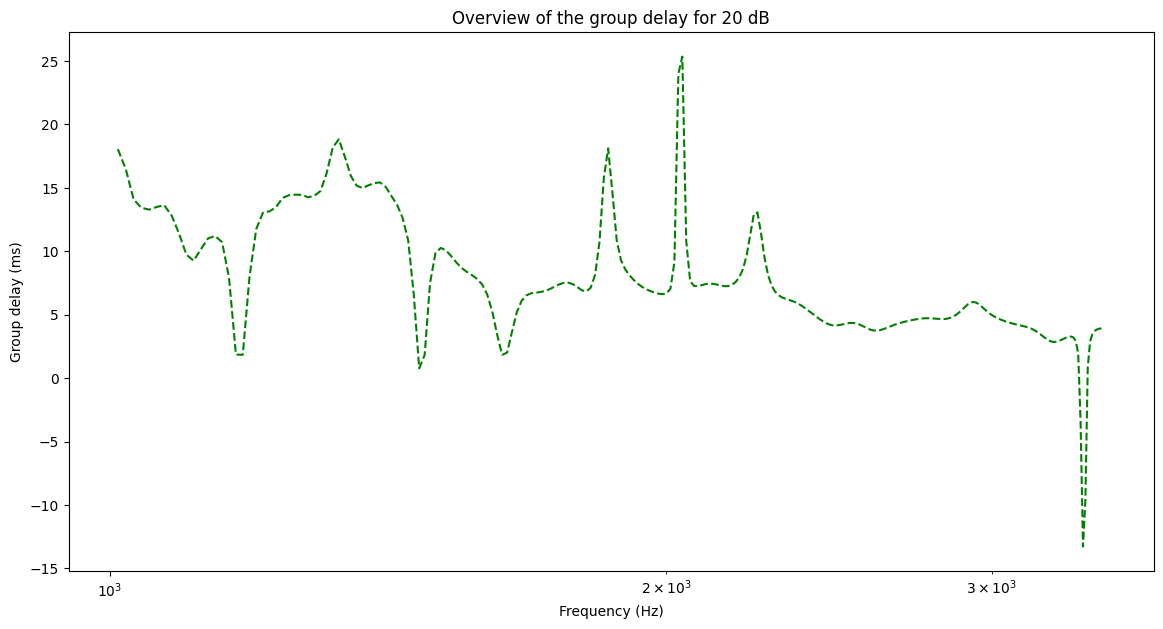

In [4]:
step_size = fvect[1] - fvect[0] # difference between neighbour samples on the frequency axis (evenly spaced)
phase_gradient = np.gradient(np.unwrap(phase), step_size)
#phase_gradient = gradient_calculation(phase_cycle)

fig, ax = plt.subplots(figsize=(14, 7))
#ax.plot(fvect, phase_gradient, '0.8', linestyle='-.', label='phase gradient')
#ax.plot(fvect[extended_maximas], phase_gradient[extended_maximas], "rx", label='local maxima and their neighbours')

group_delay = -phase_gradient/(2*np.pi)
ax.plot(fvect, 1000*group_delay, 'g', linestyle='--', label='group delay')
plt.title("Overview of the group delay for 20 dB")
# ax.plot(fvect[extended_maximas], group_delay[extended_maximas], "rx", label='local maxima and their neighbours')

# # line approximation and fitting in 2-D
# k = 1 # 2-D line
# A = np.vstack((fvect[extended_maximas], group_delay[extended_maximas]))
# B = fitAff(A, k)      
# plot2DFitLine(B, ax)


# # curve approximation and fitting in 2-D
# curve = fitCurve(fvect[extended_maximas], group_delay[extended_maximas])
# ax.plot(fvect[extended_maximas], curve, "b", label='curve fitted with curve_fit')

ax.set_xscale('log')
# ax.set_xlim([1000, 3.5e3])
# ax.set_ylim([0, 0.02])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Group delay (ms)')
# ax.legend()
# plt.show()
